# Exploratory Analysis

In [ ]:
# Setup
import pandas as pd

file = "../DodgersTempAnalysis/dodgers-2022.csv"
df = pd.read_csv(file)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


Let's take a closer look.


In [2]:
df.describe()


,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [3]:
df.head()


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


There's 81 records and an interesting date format. Let's patch that up.

In [4]:
df['date'] = pd.to_datetime(df['month'] + ' ' + df['day'].astype(str) + ' 2024', format='%b %d %Y')

df.head(-1)


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,date
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,2024-04-10
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,2024-04-11
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,2024-04-12
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,2024-04-13
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,2024-04-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,SEP,28,37133,Friday,Rockies,77,Clear,Night,NO,NO,YES,NO,2024-09-28
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO,2024-09-29
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO,2024-09-30
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO,2024-10-01


The data appear to represent a given season; we'll presume it's 2024. The dates are in order, so let's see the attendance and temperature variances.

<Axes: xlabel='day'>

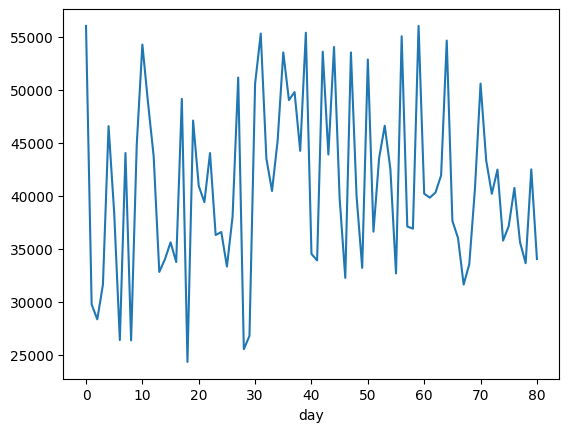

In [5]:
df['attend'].plot(xlabel='day')


<Axes: xlabel='day'>

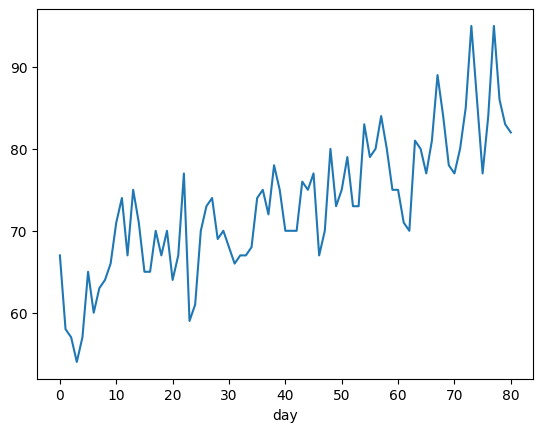

In [6]:
df['temp'].plot(xlabel='day')


It's hard to say with certainty, but it seems 'temp' is negatively correlated with 'attendance'. I have an idea to plot these against each other to see if the negative relationship is real. I'd like to use a gradient bar to represent relative temp on the attendence count, so it's easier to see the relationship.


# Visualization & Relationship Analysis

In [7]:
# setup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


In [8]:
# We'll use Normalize to span a gradient between the range of the 'temp' field, then assign it an appropriate color scheme.
norm = mcolors.Normalize(vmin=df['temp'].min(), vmax=df['temp'].max())
colors = plt.cm.coolwarm(norm(df['temp']))


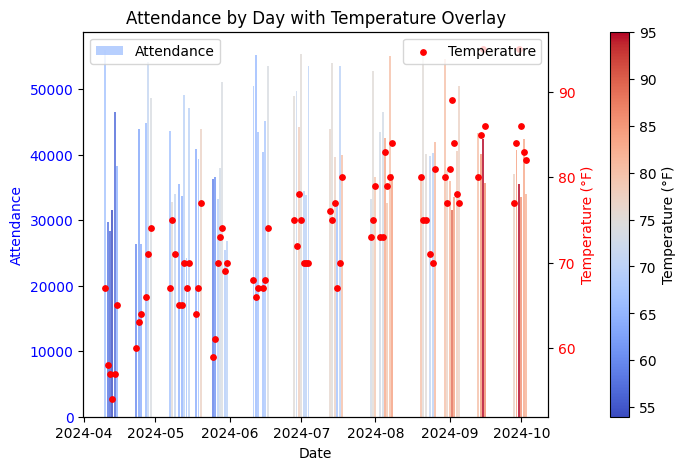

In [9]:
# Now to the visual itself.
# init figure and axes then attendence bars
fig, ax1 = plt.subplots(figsize=(8, 5))
bars = ax1.bar(df['date'], df['attend'], color=colors, label='Attendance', alpha=0.8)

# The first axis will be attendance
ax1.set_xlabel('Date')
ax1.set_ylabel('Attendance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# The second axis is temperature. Had to get some help to figure this part out :)
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1)) 
ax2.scatter(df['date'], df['temp'], color='red', label='Temperature', s=15) # use scatter to display exact temp
ax2.set_ylabel('Temperature (°F)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# To the side of the visual, we'll create a color bar as a legend to represent the temperature gradient
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1, pad=0.1)
cbar.set_label('Temperature (°F)')

# finalize & print
plt.title('Attendance by Day with Temperature Overlay')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


# Evaluation
As temperatures deviate from the mean temperature, attendence decreases. Temperature isn't the only factor in game attendence, but it's clearly relevant. Notably, temperatures +/- 10 degrees of the median have markedly reduced attendance, but not for every game. Early games may be more affected by the weather, but it's likely the start of the season is less exciting to attend. Moderate temperature (+/- 5 degrees median) games show the highest average attendence.


# Recommendation
Temperature control in outdoor environments is challenging, so multiple layers of collection and analysis would be required to justify investing. While further analysis may reveal the statistical significant difference in clustered temperature group means, a simpler and more reliable method to understand temperature's effect on attendance would be to conduct surveys of fans, both attendees and remote viewers, to better understand their preferences surrounding temperature. If the surveys revealed a significant demographic would increase their in-person attendence if temperature controls were introduced, an investment pitch could be made, and further analysis could forecast the prospective increase in revenue per attendee based on the survey responses.
